In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import datetime

%matplotlib inline

In [554]:
movies = pd.read_csv('/Users/user/FINAL CAPSTONE/inprogress3.csv')

In [538]:
movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,production,website,response,total_seasons,season,episode,series_id,budget,revenue,feature_length
0,Toy Story,1995,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,Buena Vista,http://www.disney.com/ToyStory,True,NaN,NaN,NaN,NaN,30000000.0,373554033.0,NaN
1,Jumanji,1995,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,Sony Pictures Home Entertainment,NaN,True,NaN,NaN,NaN,NaN,65000000.0,262797249.0,NaN
2,Grumpier Old Men,1995,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,Warner Home Video,NaN,True,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,Waiting to Exhale,1995,R,22-Dec-95,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,Twentieth Century Fox Home Entertainment,NaN,True,NaN,NaN,NaN,NaN,16000000.0,81452156.0,NaN
4,Father of the Bride Part II,1995,PG,8-Dec-95,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,Disney,NaN,True,NaN,NaN,NaN,NaN,0.0,76578911.0,NaN


In [467]:
movies.shape

(84523, 32)

In [468]:
movies.dtypes

title              object
year               object
rated              object
released           object
runtime            object
genre              object
director           object
writer             object
actors             object
plot               object
language           object
country            object
awards             object
poster             object
ratings            object
metascore         float64
imdb_rating       float64
imdb_votes         object
imdb_id            object
type               object
dvd                object
box_office         object
production         object
website            object
response             bool
total_seasons     float64
season            float64
episode           float64
series_id          object
budget            float64
revenue           float64
feature_length    float64
dtype: object

# Checking for Missing Data

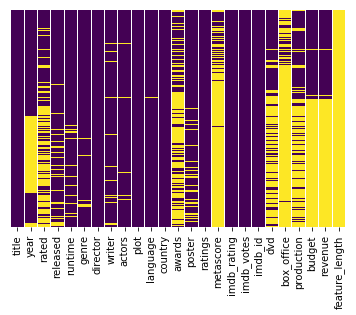

In [476]:
sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

total_seasons, season, episdoe, and series_id are all missing because I'm looking only at movies and not tv shows. So we'll drop those. 

Ratings seems to be missing some info on foreign or unrated films.

Awards, I'm guessing, are empty if the series received no awards

Metascores are only available for movies that have been rated there.

Box office is disappointingly pretty empty, so I'm going to see what I can do to inpute data there.

Production is the company that made it, and is missing in some cases. I'll see what I can do with that, too.

Type is all 'movie', so I'm going to drop that, too

Response is 'True' across the board because I got it from scraping, that will go

Dvd gives the release date of the DVD. If it's blank or empty, I assume there was no DVD release or that information is unknown.

In [539]:
movies = movies.drop(['total_seasons','season','episode','series_id',
                      'website','response','type'],axis=1)

# Drop TV shows from the dataframe
ratings = ['TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'TV-Y', 'TV-13', 'TV-Y7']

for rating in ratings:
    movies = movies[movies.rated != rating]
    
    
# Drop a few other misc TV shows that snuck through
titles = ['The Mahabharata', 'Centennial', 'Dominion Tank Police', 'Children of Dune', 'Helen of Troy']

for title in titles:
    movies = movies[movies['title'] != title]
    
movies = movies[movies['rated'] != 'E']

In [540]:
# Change year to numeric year

movies['year'] = movies['year'].str.strip('–')
movies['year'] = pd.to_numeric(movies['year'])

In [541]:
movies = movies.drop_duplicates(subset='plot')
movies.shape

(59220, 25)

In [475]:
movies.head(3)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
0,Toy Story,1995.0,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,95.0,8.3,"788,709",tt0114709,20-Mar-01,NaN,Buena Vista,30000000.0,373554033.0,NaN
1,Jumanji,1995.0,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,39.0,7.0,"267,973",tt0113497,25-Jan-00,NaN,Sony Pictures Home Entertainment,65000000.0,262797249.0,NaN
2,Grumpier Old Men,1995.0,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,46.0,6.6,"22,329",tt0113228,18-Nov-97,NaN,Warner Home Video,0.0,0.0,NaN


In [477]:
movies['box_office'] = movies['box_office'].str.replace(',', '')
movies['box_office'] = movies['box_office'].str.replace('$', '')

# Fix entries that have a period and 'k' at the end for thousand
movies['box_office'] = movies['box_office'].str.replace('.', '')
movies['box_office'] = movies['box_office'].str.replace('k', '00')
movies['box_office'] = movies['box_office'].astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [478]:
# movies['box_office'] = movies['box_office'].fillna(-1)
movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
0,Toy Story,1995.0,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,95.0,8.3,"788,709",tt0114709,20-Mar-01,NaN,Buena Vista,30000000.0,373554033.0,NaN
1,Jumanji,1995.0,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,39.0,7.0,"267,973",tt0113497,25-Jan-00,NaN,Sony Pictures Home Entertainment,65000000.0,262797249.0,NaN
2,Grumpier Old Men,1995.0,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,...,46.0,6.6,"22,329",tt0113228,18-Nov-97,NaN,Warner Home Video,0.0,0.0,NaN
3,Waiting to Exhale,1995.0,R,22-Dec-95,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",...,NaN,5.8,"8,640",tt0114885,6-Mar-01,NaN,Twentieth Century Fox Home Entertainment,16000000.0,81452156.0,NaN
4,Father of the Bride Part II,1995.0,PG,8-Dec-95,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,...,49.0,6.0,"31,241",tt0113041,9-May-00,NaN,Disney,0.0,76578911.0,NaN


In [479]:
movies['box_office'].isnull().value_counts()

True     55053
False     4167
Name: box_office, dtype: int64

In [480]:
movies['box_office'] = movies.box_office.combine_first(movies.revenue)

In [481]:
box_office = pd.DataFrame()
box_office = movies[movies['box_office'] != 0]
box_office['box_office'].describe()

count    7.511000e+03
mean     3.784113e+07
std      1.041053e+08
min      1.000000e+00
25%      6.186910e+05
50%      8.890685e+06
75%      3.852286e+07
max      5.819254e+09
Name: box_office, dtype: float64

In [325]:
box_max = movies['box_office'].max()

In [326]:
movies[movies['box_office'] == box_max]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
6597,Halloween,2007.0,R,31-Aug-07,109 min,"Fantasy, Horror",Rob Zombie,"Rob Zombie (screenplay), John Carpenter, Debra...","Malcolm McDowell, Brad Dourif, Tyler Mane, Dae...","After being committed for 17 years, Michael My...",...,47.0,6.1,"101,796",tt0373883,18-Dec-07,5.819254e+09,MGM,15000000.0,80253908.0,NaN


This datapoint is incorrect, as the highest ever grossing film ever is Avatar with 2.7 billion, whereas it's saying Halloween made 5.8 billion. Its box office worldwide was actually 80,253,908, so we're going to switch that.

Another movie, 'Unleashed' from 2005 was also showing an erroneous value of 2.4 billion when its actual box office was 50 million. Now the max film is Titanic from 1997, which is correct,

In [327]:
movies = movies.replace(5819254500.0, 80253908.0)
movies = movies.replace(2438011200.0, 50871113.0)

In [328]:
movies['box_office'].max()

1845034188.0

In [329]:
movies[movies['box_office'] == movies['box_office'].max()]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
1298,Titanic,1997.0,PG-13,19-Dec-97,194 min,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",A seventeen-year-old aristocrat falls in love ...,...,75.0,7.8,"951,902",tt0120338,10-Sep-12,1.845034e+09,Paramount Pictures,200000000.0,1.845034e+09,NaN


In [330]:
boxoffice_high = movies.sort_values(by='year', ascending=False)
boxoffice_high.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
9954,9-Jun,2018.0,Not Rated,9-Jun-18,95 min,"Horror, Mystery, Thriller",T. Michael Conway,T. Michael Conway,"Jon Ray, Trevor Williams, Maggie Blazunas, Ala...",What happened on june 9? On a search for some ...,...,NaN,4.7,315,tt0933876,NaN,0.0,NaN,0.0,0.0,NaN
13634,Punk's Dead: SLC Punk 2,2016.0,Not Rated,NaN,75 min,Comedy,James Merendino,James Merendino,"Ben Schnetzer, Hannah Marks, Machine Gun Kelly...",A young punk's odyssey.,...,NaN,4.9,768,tt2836166,8-Mar-16,0.0,NaN,0.0,0.0,NaN
16666,Spare Parts,2015.0,PG-13,5-Jun-15,114 min,Drama,Sean McNamara,Joshua Davis (based on the Wired Magazine arti...,"George Lopez, Marisa Tomei, Jamie Lee Curtis, ...",Four Hispanic high school students form a robo...,...,50.0,7.3,"9,649",tt3233418,5-May-15,0.0,Pantelion Films,0.0,0.0,NaN
16294,Drunk Stoned Brilliant Dead: The Story of the ...,2015.0,Not Rated,25-Sep-15,98 min,"Documentary, History",Douglas Tirola,"Mark Monroe, Douglas Tirola","Danny Abelson, Judd Apatow, Kevin Bacon, Henry...",A look at the history of the American comedy p...,...,74.0,7.2,"1,884",tt1674785,19-Apr-16,60269.0,Magnolia Pictures,0.0,0.0,NaN
16300,In Football We Trust,2015.0,NaN,23-Jan-15,87 min,"Documentary, Family, Sport","Tony Vainuku, Erika Cohn(co-director)",NaN,NaN,"""In Football We Trust"" captures a snapshot in ...",...,NaN,7.4,49,tt1780871,NaN,0.0,ITVS,0.0,0.0,NaN


The average movie makes 8.7 million with a standard deviation of 103.8 million.


/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/user/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


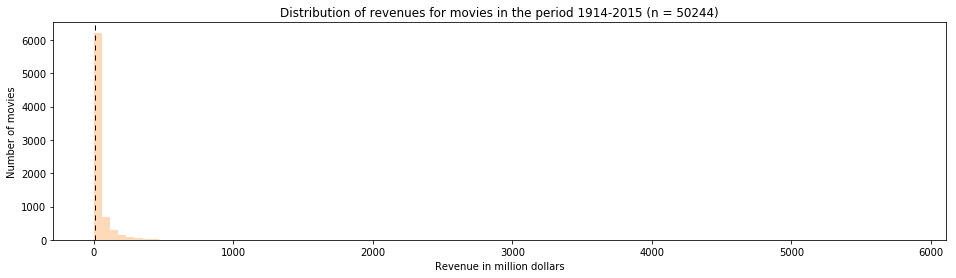

In [331]:
# Plot the box office histogram

#Plot revenue histogram
print(f"The average movie makes {round(box_office['box_office'].median()/1E6,1)} million with a standard deviation of {round(box_office['box_office'].std()/1E6,1)} million.")

plt.figure(figsize=(16, 4))
plt.hist(box_office['box_office']/1E6, 100, color='peachpuff')
plt.axvline((box_office['box_office'].median())/1E6, color='k', dashes=[5,5] , linewidth=1) #Create reference line

plt.xlabel('Revenue in million dollars')
plt.ylabel('Number of movies')  
plt.title('Distribution of revenues for movies in the period 1914-2015 (n = ' + str(len(box_office)) + ')')
plt.show()

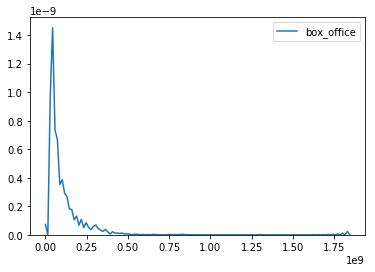

In [332]:
sns.kdeplot(movies['box_office'].dropna())

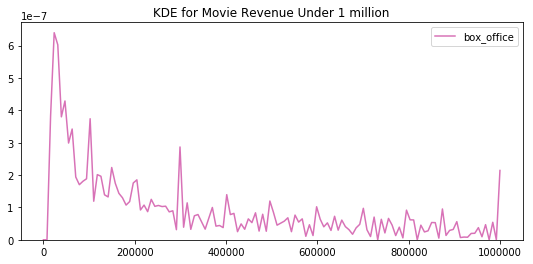

In [333]:
plt.figure(figsize=(9, 4))
plt.title("KDE for Movie Revenue Under 1 million")
sns.kdeplot(movies[movies['box_office'] <= 1000000]['box_office'].dropna(), color='#D872B7')

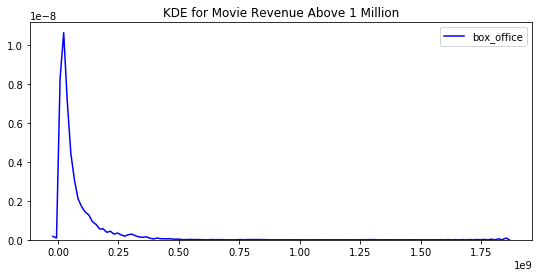

In [334]:
plt.figure(figsize=(9, 4))
plt.title("KDE for Movie Revenue Above 1 Million")
sns.kdeplot(movies[movies['box_office'] > 1000000]['box_office'].dropna(), color='blue')

In [335]:
high_gross = movies[movies['box_office'] > 50000000]
print(high_gross.shape)

(1530, 25)


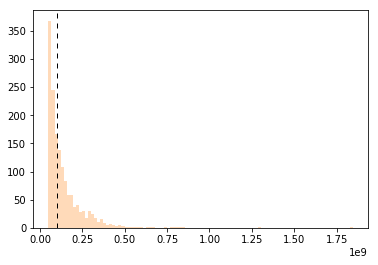

In [336]:
plt.hist(high_gross['box_office'], 100, color='peachpuff')
plt.axvline((high_gross['box_office'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line

In [337]:
print(high_gross['box_office'].max())

1845034188.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a5181b5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5181bc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5181b128>],
 'medians': [<matplotlib.lines.Line2D at 0x1a51822320>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a51822668>],
 'means': []}

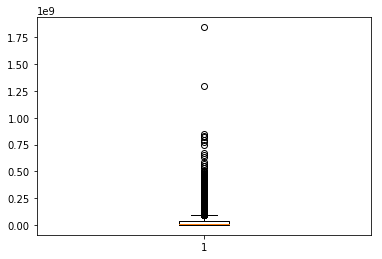

In [338]:
over_zero = movies[movies['box_office'] > 0]
plt.boxplot(over_zero['box_office'])

Text(0, 0.5, 'Box Office (millions)')

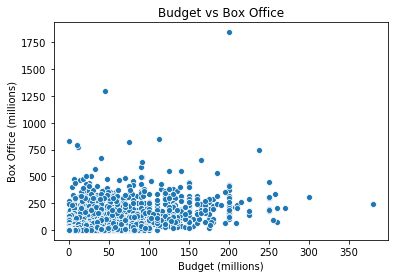

In [339]:
budget = movies['budget']/1E6
box_office = movies['box_office']/1E6

sns.scatterplot(x=budget,y=box_office)
plt.title('Budget vs Box Office')
plt.xlabel('Budget (millions)')
plt.ylabel('Box Office (millions)')

At this point in the data analysis I realized that I'm missing a lot of recent, very popular movies: namely high grossing / high revenue movies and movies from the last few years, so I'm going back to scrape more data. 

# Data Analysis and Exploration 

In [340]:
movies.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'dvd',
       'box_office', 'production', 'budget', 'revenue', 'feature_length'],
      dtype='object')

In [341]:
movies.head(2)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
0,Toy Story,1995.0,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,95.0,8.3,"788,709",tt0114709,20-Mar-01,373554033.0,Buena Vista,30000000.0,373554033.0,NaN
1,Jumanji,1995.0,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,...,39.0,7.0,"267,973",tt0113497,25-Jan-00,262797249.0,Sony Pictures Home Entertainment,65000000.0,262797249.0,NaN


In [342]:
movies['dvd'][0]

'20-Mar-01'

In [343]:
movies.describe()

,year,metascore,imdb_rating,box_office,budget,revenue,feature_length
count,32110.000000,9499.000000,67462.000000,2.477900e+04,2.470000e+04,2.469900e+04,0.0
mean,1982.369044,57.598063,6.174912,1.115010e+07,6.414346e+06,1.687527e+07,NaN
std,24.637897,17.843454,1.177435,4.459843e+07,2.085086e+07,7.434122e+07,NaN
min,1891.000000,1.000000,1.100000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1957.000000,45.000000,5.500000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,1989.000000,59.000000,6.300000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,2005.000000,71.000000,7.000000,2.213330e+05,1.500000e+05,0.000000e+00,NaN
max,2018.000000,100.000000,9.600000,1.845034e+09,3.800000e+08,2.787965e+09,NaN


In [344]:
movies.dtypes

title              object
year              float64
rated              object
released           object
runtime            object
genre              object
director           object
writer             object
actors             object
plot               object
language           object
country            object
awards             object
poster             object
ratings            object
metascore         float64
imdb_rating       float64
imdb_votes         object
imdb_id            object
dvd                object
box_office        float64
production         object
budget            float64
revenue           float64
feature_length    float64
dtype: object

The columms of the dataframe are the following:

1. **Title**: The title of the movie or film  
2. **Year** : The year the movie came out  
3. **Rated**: The movie's rating in the USA from G to NC-17 
4. **Released**: The release date
5. **Runtime**: Runtime in minutes
6. **Genre**: Movie genres
7. **Director**: The director
8. **Writer**
9. **Actors:** The main actors in the movie
10. **Plot**: A brief synopsis of the movie
11. **Language**: The movie's original language
12. **Country**
13. **Awards**: nominations for awards and received awards
14. **Poster**: A link to the poster of the movie
15. **Ratings**: The imdb rating (repeated a column later) -- drop
16. **Metascore**: The score on metacritic -- missing in many cases
17. **imdb_rating**: The rating on imdb.com
18. **imdb_votes**: The number of people who have voted on the movie (compiling the rating)
19. **imdb_id**: The unique ID on imdb.com for the movie in question
20. **dvd**: The DVD release date
21. **box_office**: The box office total
22. **production**: The production company, if known
23. **budget**: The budget for the film
24. **revenue**: The revenue of the film

In [482]:
# Change dtypes of appropriate columns
# year to int or datetime, released to datetime, runtime to int, imdb_votes to int, dvd to date
# drop: ratings, metascore

movies = movies.drop(['ratings','metascore'], axis=1)

# Change 'released' to datetime
movies['released'] = movies['released'].str.strip('–')
movies['released'] = pd.to_datetime(movies['released'],errors='raise')

# For rows where there was no release date, impute year from ['year'] column
movies['released'] = movies.released.combine_first(movies.year)

In [483]:
movies.rated.value_counts()

movies['rated'] = movies['rated'].apply(lambda x: str(x).upper())

#### Ratings

In [347]:
# movies = pd.read_csv('tempimdbinfo-May-28-1635.csv')

In [348]:
# movies = movies.drop('Unnamed: 0',axis=1)
# movies.head(1)

In [486]:
movies['rated'].value_counts()

NO INFO      27581
R            11633
NOT RATED     5778
APPROVED      4027
PG            3766
PG-13         3215
UNRATED       1277
G             1073
NC-17          840
U                8
6                3
VR14             2
T                2
III              2
R/NC-17          2
AL               2
11               2
A                2
7                1
O.AL.            1
C                1
14               1
AO               1
Name: rated, dtype: int64

In [485]:
import re

# Cleaning up ratings
# Look if unrated is different from not rated

movies['rated'] = movies['rated'].str.replace('M/PG', 'PG')
movies['rated'] = movies['rated'].str.replace('UNRATED','FOREIGN')
movies['rated'] = movies['rated'].str.replace('NR', 'NOT RATED')
movies['rated'] = movies['rated'].str.replace('GP', 'PG')
movies['rated'] = movies['rated'].str.replace('M/PG', 'PG')
movies['rated'] = movies['rated'].str.replace('PASSED', 'APPROVED')
movies['rated'] = movies['rated'].str.replace('NAN', 'NO INFO')
movies['rated'] = movies['rated'].str.replace('M/PG', 'PG')
movies['rated'] = movies['rated'].str.replace('S', 'NOT RATED')
movies['rated'] = movies['rated'].str.replace('OPEN', 'NOT RATED')
movies['rated'] = movies['rated'].str.replace('BANNED', 'NC-17')
movies['rated'] = movies['rated'].str.replace('FOREIGN','UNRATED')

# Foreign movie ratings are moved to their closest US equivalent
movies['rated'] = movies['rated'].str.replace('K-16','R')
movies['rated'] = movies['rated'].str.replace('K-12','PG-13')
movies['rated'] = movies['rated'].str.replace('12','PG-13')
movies['rated'] = movies['rated'].str.replace('15','R')
movies['rated'] = movies['rated'].str.replace('16','R')
movies['rated'] = movies['rated'].str.replace('18','NC-17')
movies['rated'] = movies['rated'].str.replace('BTL','G')
movies['rated'] = movies['rated'].str.replace('K-8','PG')



# I'm also going to lump in 'X' with NC-17 and 'M' with 'R' as these are usually equivalent

movies['rated'] = movies['rated'].str.replace('M', 'R')
movies['rated'] = movies['rated'].str.replace('X', 'NC-17')

movies['rated'] = movies['rated'].str.strip('\(')
movies['rated'] = movies['rated'].str.strip('\)')

In [373]:
# Fuck it

movies = movies[movies['rated'] != 'AO']
movies['rated'].value_counts()

NO INFO      35536
R            11642
NOT RATED     5676
APPROVED      4120
PG            3945
PG-13         3253
UNRATED       1258
G             1117
NC-17          872
Name: rated, dtype: int64

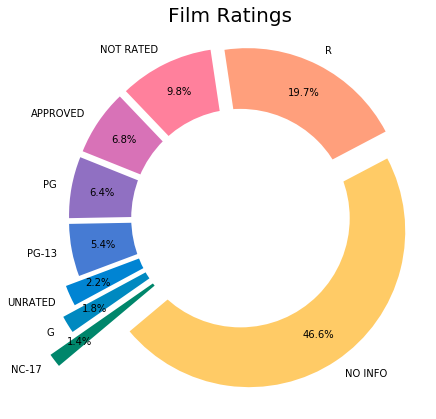

In [487]:
# pie chart of ratings
c_scheme = ['#FFCB66', '#FF9F7C', '#FF809C', '#D872B7', '#9070C2', '#467BD3', '#0084D3', '#0089C0', '#00866B']
labels = movies['rated'].value_counts().index[:9]
#labels = ['No Info', 'R','Not Rated','Approved','PG-13','PG','Unrated','G','NC-17']
explode = (.1, .1, .1, .1, .1, .1, .2, .3, .5)

sizes = movies.rated.value_counts()[:9]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=220, pctdistance=0.80, shadow=False, colors=c_scheme)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
#plt.tight_layout()
plt.title('Film Ratings', fontsize=20)
plt.show()

#### Runtime

Removing the 'min' from runtime and changing the format 

In [488]:
movies['runtime'] = movies['runtime'].str.strip('min')

# Change to numeric
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

In [489]:
movies['runtime'].describe()

count    57109.000000
mean        96.813427
std         24.387959
min          1.000000
25%         86.000000
50%         94.000000
75%        105.000000
max        931.000000
Name: runtime, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

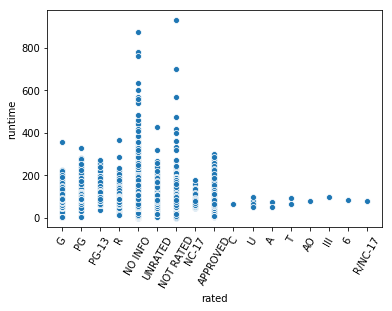

In [496]:
sns.scatterplot(x='rated',y='runtime',data=movies)
plt.xticks(rotation=60)

Seeing as it says the longest movie is 931 minutes (15 hours), I am going to investigate this because it's quite the outlier.

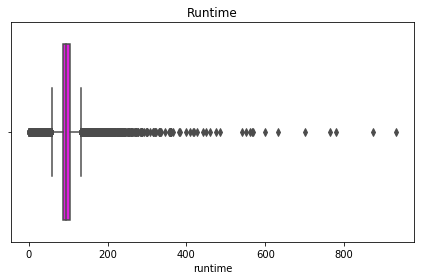

In [497]:
runtime = movies['runtime']


# Runtime plot
sns.boxplot(runtime, color='fuchsia').set_title('Runtime')    

plt.tight_layout()
plt.show()

In [498]:
movies[movies['runtime'] == 931]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
22123,Berlin Alexanderplatz,1980.0,NOT RATED,1983-08-10,931.0,"Crime, Drama",NaN,NaN,"Günter Lamprecht, Claus Holm, Hanna Schygulla,...","In late-1920s Berlin, Franz Biberkopf is relea...",...,https://m.media-amazon.com/images/M/MV5BMTg5MT...,8.7,"3,533",tt0080196,NaN,0.0,NaN,0.0,0.0,NaN


It turns out that the runtime of 15 hours is a miniseries. Since I really do only want to look at movies, I'm going to investigate some of the other movies of lengths above 5 hours (300 minutes)

In [499]:
movies[movies['runtime'] > 500]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
12637,New York: A Documentary Film,1999.0,NO INFO,1999-09-01,600.0,"Documentary, History",NaN,NaN,"David Ogden Stiers, John Steele Gordon, Kennet...",Ric Burns (brother of the famed documentarian ...,...,https://images-na.ssl-images-amazon.com/images...,9.1,717,tt0220924,NaN,0.0,NaN,0.0,0.0,NaN
12647,Tie Xi Qu: West of the Tracks,2002.0,NO INFO,2004-06-09,551.0,Documentary,Bing Wang,NaN,NaN,The impact of the decline of heavy industry on...,...,https://m.media-amazon.com/images/M/MV5BMTc4Nj...,8.6,881,tt0389448,NaN,0.0,NaN,0.0,0.0,NaN
13589,Island at War,2004.0,NO INFO,2005-01-23,540.0,"Drama, War",NaN,NaN,"Saskia Reeves, Owen Teale, Julia Ford, Clare H...",Period: Second World War. A quiet channel isla...,...,http://ia.media-imdb.com/images/M/MV5BYzg4NDBh...,7.7,839,tt0401019,NaN,NaN,NaN,NaN,NaN,NaN
19595,Shoah,1985.0,NOT RATED,1985-11-01,566.0,"Documentary, History, War",Claude Lanzmann,Claude Lanzmann,"Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann's epic documentary recounts th...,...,https://m.media-amazon.com/images/M/MV5BZDE0YT...,8.4,"7,467",tt0090015,7-Oct-03,15642.0,IFC Films,0.0,0.0,NaN
22123,Berlin Alexanderplatz,1980.0,NOT RATED,1983-08-10,931.0,"Crime, Drama",NaN,NaN,"Günter Lamprecht, Claus Holm, Hanna Schygulla,...","In late-1920s Berlin, Franz Biberkopf is relea...",...,https://m.media-amazon.com/images/M/MV5BMTg5MT...,8.7,"3,533",tt0080196,NaN,0.0,NaN,0.0,0.0,NaN
25176,"North and South, Book II",1986.0,NO INFO,1986-05-04,570.0,"Drama, History, Romance, War",NaN,NaN,"Kirstie Alley, David Carradine, Philip Casnoff...",The story of two friends and their families on...,...,https://m.media-amazon.com/images/M/MV5BMTI4Nj...,8.1,"4,224",tt0090490,NaN,0.0,NaN,0.0,0.0,NaN
25195,"North and South, Book I",1985.0,NO INFO,1985-11-03,561.0,"Drama, History, Romance, War",NaN,Douglas Heyes,"Kirstie Alley, Georg Stanford Brown, David Car...","Two friends, one northern and one southern, st...",...,https://m.media-amazon.com/images/M/MV5BMTczMj...,8.1,"8,646",tt0088583,NaN,0.0,NaN,0.0,0.0,NaN
25318,Space,1985.0,NO INFO,1985-04-14,780.0,Drama,NaN,NaN,"James Garner, Susan Anspach, Blair Brown, Bruc...",A 13-hour mini-series detailing James A. Michn...,...,https://images-na.ssl-images-amazon.com/images...,7.4,188,tt0088611,NaN,0.0,NaN,0.0,0.0,NaN
43351,Noce i dnie,NaN,NO INFO,1975-09-23,632.0,"Drama, Romance, War",Jerzy Antczak,"Jerzy Antczak, Maria Dabrowska (novel)","Jadwiga Baranska, Jerzy Binczycki, Emir Buczac...","An epic saga of the Niechcic family, told from...",...,https://images-na.ssl-images-amazon.com/images...,7.5,254,tt0073460,19 Aug 2008,NaN,Film Polski,NaN,NaN,NaN
43760,How Yukong Moved the Mountains,NaN,NO INFO,1976-03-10,763.0,Documentary,"Joris Ivens, Marceline Loridan Ivens, Jean Big...",NaN,NaN,"From 1972 until 1974, Joris Ivens and Marcelin...",...,https://images-na.ssl-images-amazon.com/images...,7.5,48,tt0074334,NaN,NaN,NaN,NaN,NaN,NaN


In [500]:
movies[movies['runtime'] < 70]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
32,Wings of Courage,1995.0,G,1996-09-18 00:00:00.000000000,40.0,"Adventure, Romance",Jean-Jacques Annaud,"Alain Godard, Jean-Jacques Annaud","Craig Sheffer, Tom Hulce, Elizabeth McGovern, ...","While flying mail across the Andean mountains,...",...,https://m.media-amazon.com/images/M/MV5BZWRjOG...,6.5,571,tt0114952,30-Jun-98,0.0,Sony Pictures Entertainment,0.0,0.0,NaN
36,Across the Sea of Time,1995.0,G,1995-10-20 00:00:00.000000000,51.0,"Adventure, Drama, Family, History",Stephen Low,Andrew Gellis,"Peter Reznick, John McDonough, Avi Hoffman, Vi...","A young Russian boy, Thomas Minton, travels to...",...,https://m.media-amazon.com/images/M/MV5BOTIwMz...,6.4,224,tt0112286,30-Jun-98,0.0,Sony Pictures Classics,0.0,0.0,NaN
76,Nico Icon,1995.0,NO INFO,1995-11-16 00:00:00.000000000,67.0,"Documentary, Biography, Music",Susanne Ofteringer,Susanne Ofteringer (screenplay),"Nico, Tina Aumont, Christian Päffgen, Edith Bo...","A look into the many lives of Christa Päffgen,...",...,https://m.media-amazon.com/images/M/MV5BNTY2MD...,7.3,622,tt0113973,NaN,0.0,NaN,0.0,0.0,NaN
382,The Secret Adventures of Tom Thumb,1993.0,UNRATED,1995-01-13 00:00:00.000000000,60.0,"Animation, Adventure, Sci-Fi",Dave Borthwick,Dave Borthwick,"Nick Upton, Deborah Collard, Frank Passingham,...",A boy born the size of a small doll is kidnapp...,...,https://m.media-amazon.com/images/M/MV5BMTk1NT...,7.4,"1,358",tt0108069,28-Jul-98,0.0,Palm Pictures,0.0,0.0,NaN
580,A Great Day in Harlem,1994.0,NOT RATED,1995-02-24 00:00:00.000000000,60.0,"Documentary, Music",Jean Bach,"Jean Bach, Susan Peehl, Matthew Seig","Quincy Jones, Dizzy Gillespie, Sonny Rollins, ...","Art Kane, now deceased, coordinated a group ph...",...,https://images-na.ssl-images-amazon.com/images...,7.6,362,tt0109934,3-Jan-06,0.0,A B C Home Video,0.0,0.0,NaN
644,Some Folks Call It a Sling Blade,1994.0,NOT RATED,1999-11-23 00:00:00.000000000,25.0,"Short, Drama, Thriller",George Hickenlooper,Billy Bob Thornton,"Billy Bob Thornton, Molly Ringwald, J.T. Walsh...",Twenty-five years after commiting a double mur...,...,https://m.media-amazon.com/images/M/MV5BMTMxNz...,7.5,"1,579",tt0108181,19-Mar-02,0.0,Vanguard,0.0,0.0,NaN
701,A Close Shave,1995.0,NOT RATED,1995-12-29 00:00:00.000000000,30.0,"Animation, Short, Comedy, Crime, Family",Nick Park,"Bob Baker, Nick Park","Peter Sallis, Anne Reid",Wallace's whirlwind romance with the owner of ...,...,https://m.media-amazon.com/images/M/MV5BNzliZj...,8.2,"35,682",tt0112691,NaN,0.0,Northern Arts Entertainment,0.0,0.0,NaN
721,Marlene Dietrich: Shadow and Light,1996.0,NO INFO,1996-04-02 00:00:00.000000000,52.0,Documentary,Chris Hunt,NaN,"Marlene Dietrich, Maria Riva, David Riva, Stev...",Following the life of Marlene Dietrich through...,...,NaN,7.1,62,tt0116992,NaN,NaN,NaN,NaN,NaN,NaN
927,The Wrong Trousers,1993.0,NOT RATED,1993-12-17 00:00:00.000000000,30.0,"Animation, Short, Comedy, Crime, Family, Sci-Fi",Nick Park,"Nick Park, Bob Baker, Brian Sibley (additional...",Peter Sallis,"Wallace takes in a new lodger, a devious pengu...",...,https://m.media-amazon.com/images/M/MV5BNDBmNG...,8.3,"47,252",tt0108598,1-Aug-95,0.0,NaN,0.0,0.0,NaN
928,JLG/JLG: Self-Portrait in December,1994.0,NO INFO,1995-03-08 00:00:00.000000000,62.0,"Documentary, Drama",Jean-Luc Godard,Jean-Luc Godard,"Jean-Luc Godard, Geneviève Pasquier, Denis Jad...",Director Jean-Luc Godard reflects in this movi...,...,https://m.media-amazon.com/images/M/MV5BNjU4MT...,7.3,626,tt0110173,NaN,0.0,NaN,0.0,0.0,NaN


In [506]:
movies.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'imdb_rating', 'imdb_votes', 'imdb_id', 'dvd', 'box_office',
       'production', 'budget', 'revenue', 'feature_length'],
      dtype='object')

A feature film (or just “feature”) is a full-length film, the kind you buy a ticket for at your local theater. The term is also used to distinguish between films that are first shown theatrically versus those made for television.

A modern feature is typically between 80 and 180 minutes long, but different groups have different minimum lengths to be considered a feature. The Screen Actors Guild definition sets the minimum length at 80 minutes, while AFI and BFI’s definitions call any film longer than 40 minutes a feature. The Academy also uses the 40 minute benchmark to determine if a film is a feature or a short. The Sundance Film Festival sets the line at 50 minutes.

For my purposes, I'm going to create features for films based on the length of the film, in the following categories:

1. Less than 40 minutes: 'Short'
2. Less than 80 minutes: 'Below minimum'
3. Between 80 and 180 minutes: 'Feature-length'
4. Above 180 minutes but below 300: 'Long'
5. Above 300 minutes: 'Very long or miniseries (VLMS)'

In [501]:
runtimes = []

for runtime in movies['runtime']:
    if runtime < 40:
        runtimes.append('Short')
    elif runtime < 80:
        runtimes.append('Below minimum')
    elif runtime < 180:
        runtimes.append('Feature-length')
    elif runtime < 300:
        runtimes.append('Long')
    elif runtime >= 300:
        runtimes.append('VLMS')
    else:
        runtimes.append('No Info')

In [502]:
movies['feature_length'] = runtimes

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

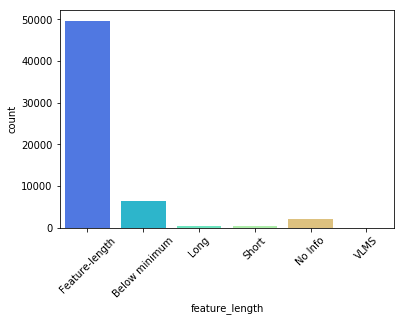

In [503]:
sns.countplot(movies['feature_length'], palette='rainbow')
plt.xticks(rotation=45)

Text(0.5, 0, 'Runtime in Minutes')

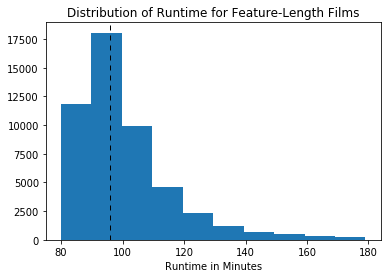

In [504]:
feature_length = movies[movies['feature_length'] == 'Feature-length']

plt.hist(feature_length['runtime'])
plt.axvline((feature_length['runtime'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line
plt.title('Distribution of Runtime for Feature-Length Films')
plt.xlabel('Runtime in Minutes')


Text(0, 0.5, 'Revenue (in millions)')

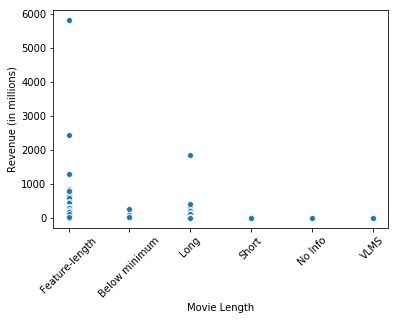

In [505]:
box_office = movies['box_office']/1E6

sns.scatterplot(x=movies['feature_length'],y=box_office)
plt.xticks(rotation=45)
plt.xlabel('Movie Length')
plt.ylabel('Revenue (in millions)')

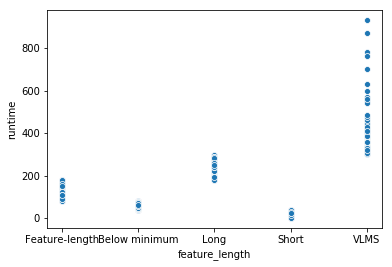

In [510]:
sns.scatterplot(x='feature_length', y='runtime',data=movies)

In [509]:
long = movies[movies['feature_length'] == 'Long']['box_office'].max()
movies[movies['box_office'] == long]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
1298,Titanic,1997.0,PG-13,1997-12-19,194.0,"Drama, Romance",James Cameron,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",A seventeen-year-old aristocrat falls in love ...,...,https://m.media-amazon.com/images/M/MV5BMDdmZG...,7.8,"951,902",tt0120338,10-Sep-12,1.845034e+09,Paramount Pictures,200000000.0,1.845034e+09,Long


#### Year

Text(0.5, 1.0, 'Distribution of Movies by Year')

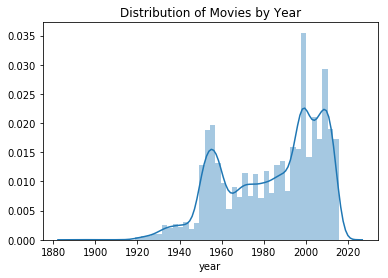

In [511]:
sns.distplot(movies['year'].dropna())
plt.title('Distribution of Movies by Year')

Text(0, 0.5, 'box_office')

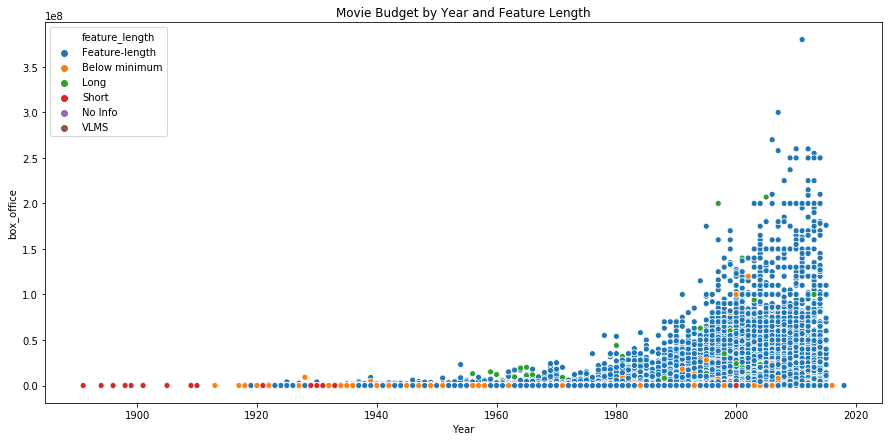

In [513]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='year',y='budget',hue='feature_length',data=movies)
plt.title('Movie Budget by Year and Feature Length')
plt.xlabel('Year')
plt.ylabel('box_office')

In [514]:
movies[movies['budget'] > 300000000.0]

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
9965,Pirates of the Caribbean: On Stranger Tides,2011.0,PG-13,2011-05-20,136.0,"Action, Adventure, Fantasy",Rob Marshall,"Ted Elliott (screenplay), Terry Rossio (screen...","Johnny Depp, Penélope Cruz, Geoffrey Rush, Ian...",Jack Sparrow and Barbossa embark on a quest to...,...,https://m.media-amazon.com/images/M/MV5BMjE5Mj...,6.6,"445,615",tt1298650,18-Oct-11,241063875.0,Walt Disney Pictures,380000000.0,1.045714e+09,Feature-length


#### DVD Date

* Change to datetime

In [515]:
movies['dvd'] = pd.to_datetime(movies['dvd'],errors='raise')
movies['dvd'].head(5)

0   2001-03-20
1   2000-01-25
2   1997-11-18
3   2001-03-06
4   2000-05-09
Name: dvd, dtype: datetime64[ns]

#### IMDB votes to numeric

In [516]:
movies['imdb_votes'] = movies['imdb_votes'].str.replace(',','')
movies['imdb_votes'] = pd.to_numeric(movies['imdb_votes'])

Text(0, 0.5, 'Votes')

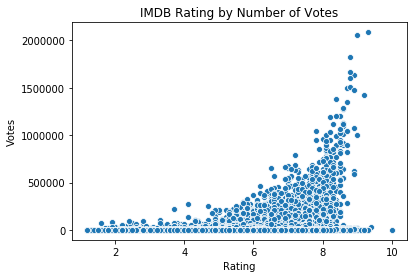

In [517]:
sns.scatterplot(x='imdb_rating', y='imdb_votes', data=movies)
plt.title('IMDB Rating by Number of Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')

In [518]:
most_votes = movies[movies['imdb_votes'] > 2000000]

In [519]:
most_votes

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
310,The Shawshank Redemption,1994.0,R,1994-10-14,142.0,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,9.3,2084570.0,tt0111161,1998-01-27,28341469.0,Columbia Pictures,25000000.0,2.834147e+07,Feature-length
6948,The Dark Knight,2008.0,PG-13,2008-07-18,152.0,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as The Joker emerges fro...,...,https://m.media-amazon.com/images/M/MV5BMTMxNT...,9.0,2056482.0,tt0468569,2008-12-09,533316061.0,Warner Bros. Pictures/Legendary,185000000.0,1.004558e+09,Feature-length


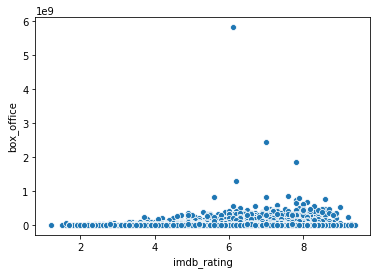

In [520]:
sns.scatterplot(x='imdb_rating',y='box_office',data=movies)

Text(0.5, 1.0, 'Distribution of IMDB Ratings')

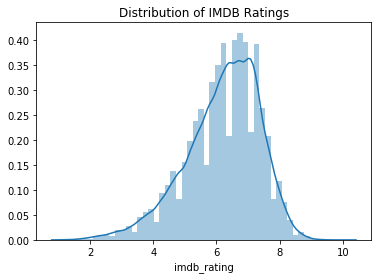

In [521]:
sns.distplot(movies['imdb_rating'].dropna())
plt.title('Distribution of IMDB Ratings')

### Country Information

Country information looks a bit all over the place. Some movies have only one country listed while others have upwards of 10. I could one-hot-encode and see what that looks like or I could split and see what I can do with stuff.

According to [IMDB](https://help.imdb.com/article/contribution/titles/countries/GTSW4DN8H8LKCXER?ref_=helpms_helpart_inline#):

IMDb defines the country of a title as the place or places where the production companies for that title are based, and therefore where the financing originated. This means, for example, even if a title is shot on location in France, if its production companies are all based in the USA, we record the country as USA.
If a title is a multi-country production, the order the countries are entered into the addition/update forms is significant and will be reflected in the display order within IMDb.
When entering country information for older titles from countries whose borders have changed over time, please select the name of the country as it was known when the title was produced. For example a title made on the western side of Germany in 1980 should be entered as West Germany whereas one produced in the same location after the re-unification of Germany should be entered simply as Germany.
To update data for categories that aren't listed above, select Choose from all sections checkbox and supply a Country correction to inform us of the new country and the title(s) to which it applies.

So in this case if there is more than one country listed, the first item in the list should be the 'majority' country, so I will use that.

In [522]:
# Turn everything into a string and strip extra whitespace, make all letters capital for uniformity
movies['country'] = movies['country'].apply(lambda x: str(x).upper())
movies['country'] = movies['country'].str.strip()

# Send information to list and take the first item of each list, the 'majority' country
countries = movies['country'].str.split(',').tolist()
country_list = list(zip(*countries))[0]

# Send back to dataframe
movies['country'] = country_list

In [523]:
not_usa = movies[movies['country'] != 'USA']

In [524]:
values = not_usa['country'].value_counts(ascending=False)[:10]

In [525]:
values.index

Index(['UK', 'FRANCE', 'ITALY', 'INDIA', 'CANADA', 'JAPAN', 'HONG KONG',
       'SPAIN', 'WEST GERMANY', 'GERMANY'],
      dtype='object')

Text(0, 0.5, 'Movie Count')

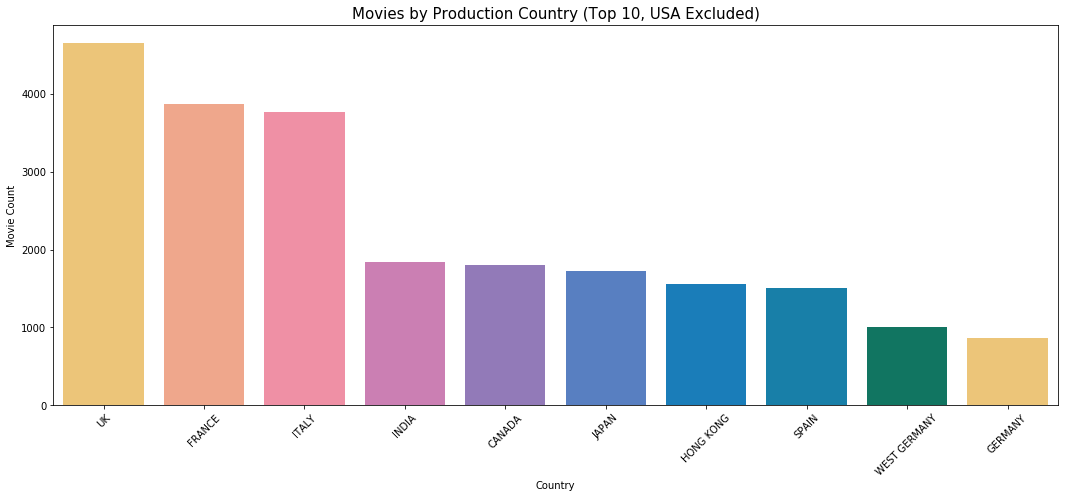

In [526]:
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.barplot(x=values.index, y=values, palette=c_scheme)
plt.xticks(rotation=45)
plt.title('Movies by Production Country (Top 10, USA Excluded)', size=15)
plt.xlabel('Country')
plt.ylabel('Movie Count')

In [527]:
not_usa = not_usa[not_usa['country'] != 'NAN']

values = not_usa['country'].value_counts(ascending=False)[:50]

Text(0, 0.5, 'Movie Count')

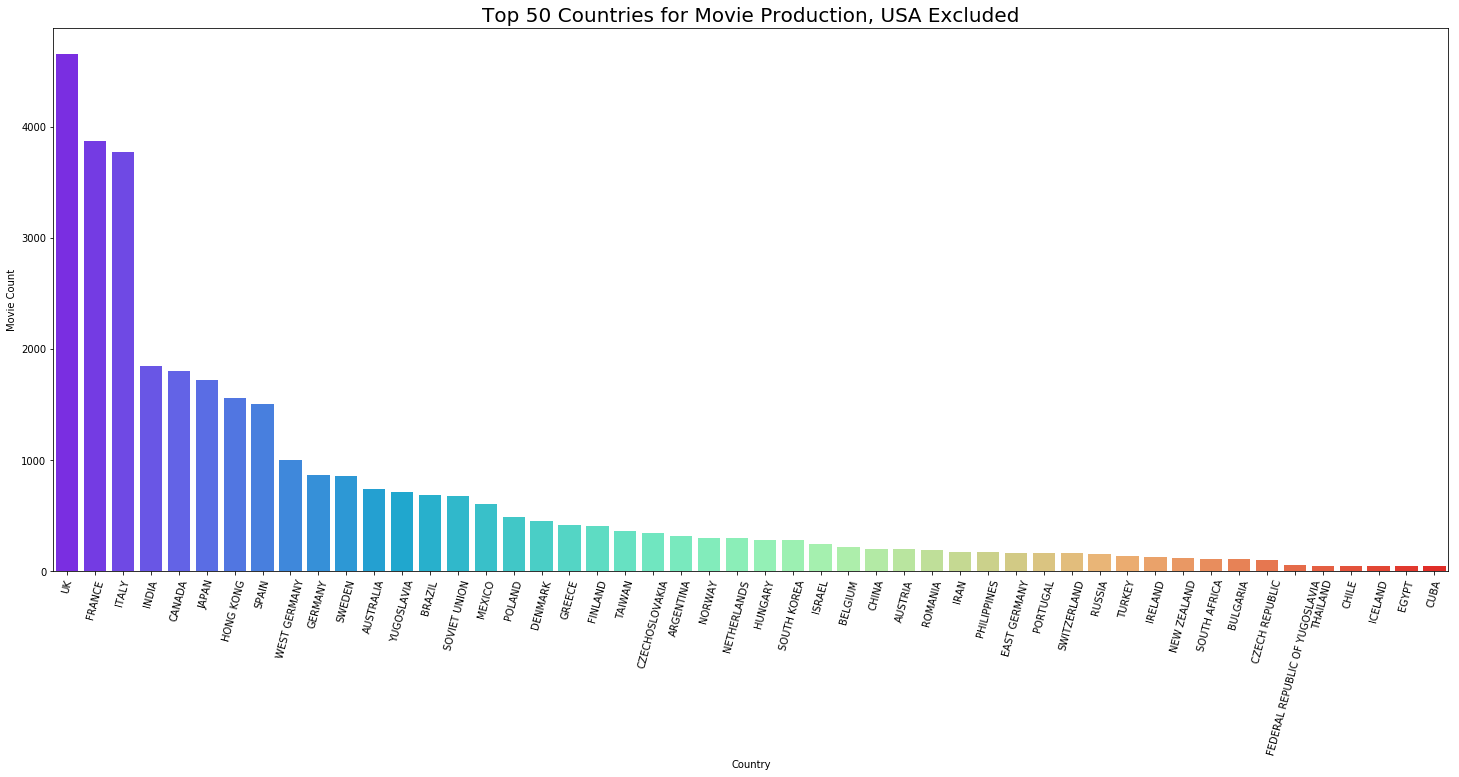

In [528]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x=values.index, y=values, palette='rainbow')
plt.xticks(rotation=75)
plt.title('Top 50 Countries for Movie Production, USA Excluded', size=20)
plt.xlabel('Country')
plt.ylabel('Movie Count')

In [295]:
# movies.to_csv('tempimdbinfo-May-28-1713.csv')


#### Writers

Writers and actors will be handled similarly: I'm going to stick their names together so that we don't get two directors whose first or last names are different. John Lasseter is the only John, and I dont want two people with simiar names getting grouped together. I'll do the same for actors.

In [296]:
# movies = pd.read_csv('tempimdbinfo-May-28-1713.csv')

In [548]:
writers = movies[movies['writer'] != 'nan']

writers.shape

(56043, 25)

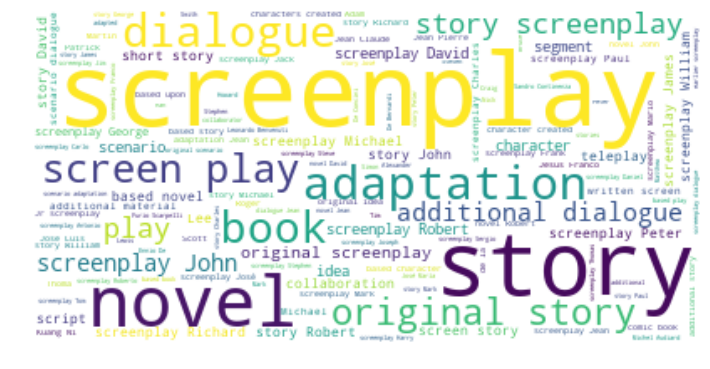

In [542]:
from wordcloud import WordCloud

In [ ]:
# Take out information between ()s
# Why is this taking information out from after ()s?
movies['writer'] = movies['writer'].str.replace(r"\(.*\)","")

# Clean so that writers are one word for later NLP
movies['writer'] = movies['writer'].apply(lambda x: str(x).replace(" ",""))


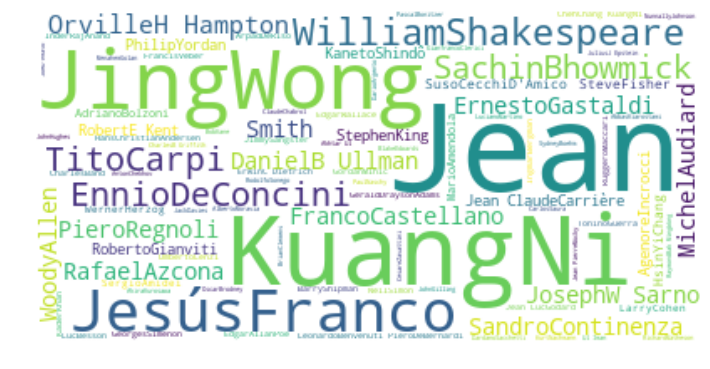

In [549]:
text = ''.join(writer for writer in writers['writer'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Make everything lowercase
movies['writer'] = movies['writer'].str.lower()

# Clean so that writers are one word for later NLP
movies['writer'] = movies['writer'].apply(lambda x: str(x).split(","))

In [410]:
movies.head(1)

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,poster,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length
0,Toy Story,1995.0,G,1995-11-22,81.0,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,[johnlasseter],"Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,8.3,788709.0,tt0114709,2001-03-20,373554033.0,Buena Vista,30000000.0,373554033.0,Feature-length


#### Actors and Directors

In [555]:
# Clean actor names and directors in the same way we cleaned writers

movies['actors'] = movies['actors'].apply(lambda x: str(x))
movies['actors'] = movies['actors'].apply(lambda x: str(x).replace(" ",""))


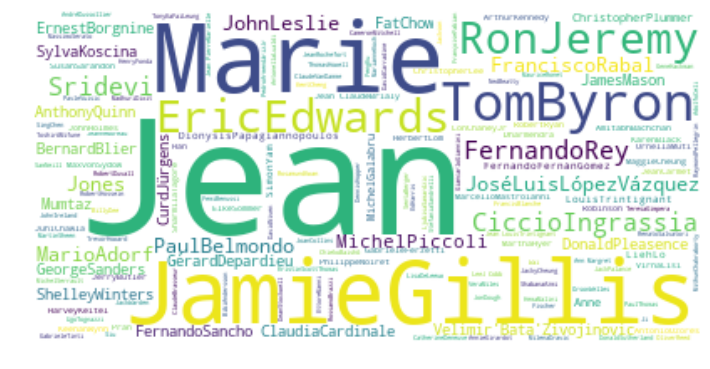

In [561]:
actors = movies[movies['actors'] != 'nan']

text = ''.join(actor for actor in actors['actors'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [560]:
text.index('Jean')

400

In [562]:
# Finish cleaning the text now that the visual is done

movies['actors'] = movies['actors'].apply(lambda x: str(x).lower())
movies['actors'] = movies['actors'].apply(lambda x: str(x).split(","))

In [412]:
# movies.to_csv('tempimdbinfo-May-28-1800.csv')

In [563]:
directors = movies[movies['director'] != "nan"]

In [564]:
values = directors['director'].value_counts()

In [565]:
values[:20].index

Index(['Jesús Franco', 'Gilberto Martínez Solares', 'Mariano Ozores',
       'Pedro Lazaga', 'Henri Pachard', 'Cheh Chang', 'Godfrey Ho',
       'Kostas Karagiannis', 'Joe D'Amato', 'Franz Antel', 'Enrique Carreras',
       'K. Balachander', 'Yôji Yamada', 'Joseph W. Sarno', 'Umberto Lenzi',
       'Steno', 'John Ford', 'Yuen Chor', 'Claude Chabrol', 'Kon Ichikawa'],
      dtype='object')

In [566]:
directors = values[:20].index

Text(0, 0.5, 'Movies Directed')

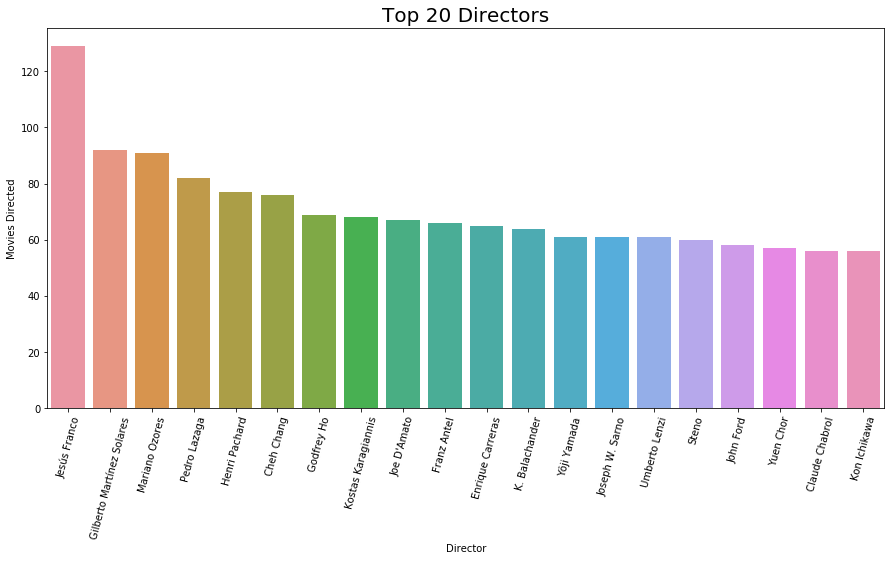

In [567]:
plt.figure(figsize=(15,7))
sns.barplot(x=directors,y=values[:20])
plt.xticks(rotation=75)
plt.title('Top 20 Directors', size=20)
plt.xlabel('Director')
plt.ylabel('Movies Directed')

Text(0, 0.5, 'Movies Directed')

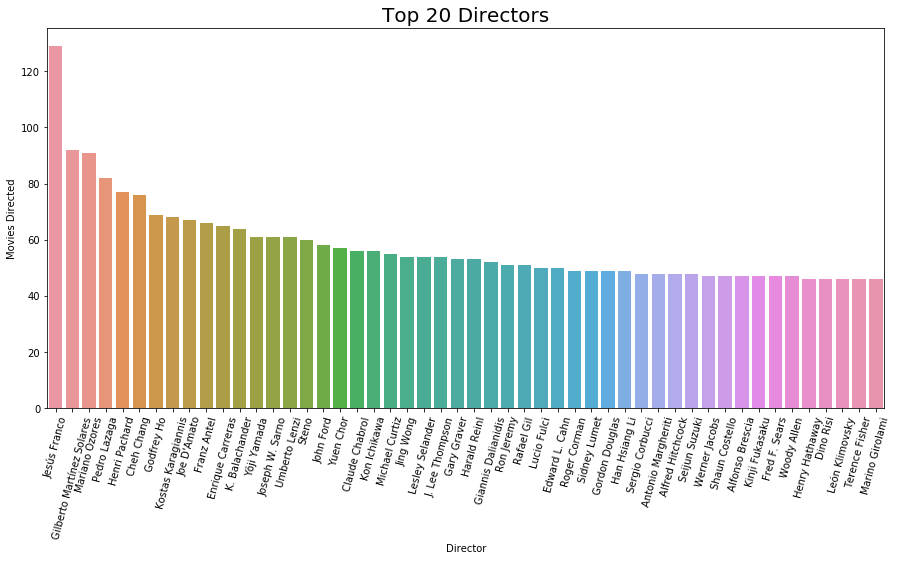

In [568]:
plt.figure(figsize=(15,7))
sns.barplot(x=values.index[:50],y=values[:50])
plt.xticks(rotation=75)
plt.title('Top 20 Directors', size=20)
plt.xlabel('Director')
plt.ylabel('Movies Directed')

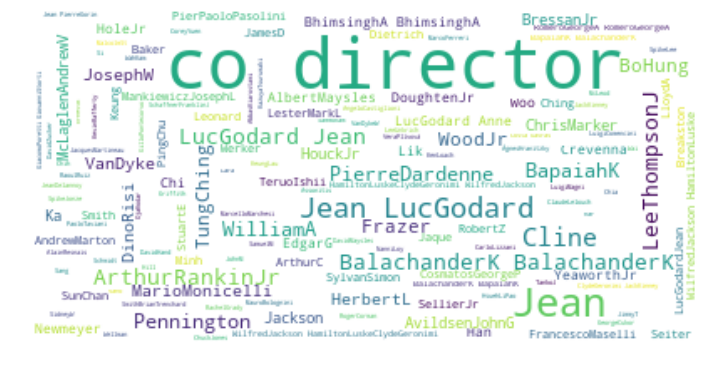

In [574]:
movies['director'] = movies['director'].apply(lambda x: str(x).replace(" ",""))
movies['director'] = movies['director'].str.replace('co director','')

directors = movies[movies['director'] != 'nan']

text = ''.join(director for director in directors['director'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [575]:
# Directors

movies['director'] = movies['director'].apply(lambda x: str(x))
movies['director'] = movies['director'].apply(lambda x: str(x).lower())
movies['director'] = movies['director'].apply(lambda x: str(x).replace(" ",""))
movies['director'] = movies['director'].apply(lambda x: str(x).split(","))
movies['director'] = movies['director'].apply(lambda x: str(x).replace(".",""))

In [576]:
movies['language']

0                                English
1                        English, French
2               English, Italian, German
3                                English
4                                English
5                       English, Spanish
6                        English, French
7                                English
8                                English
9              English, Russian, Spanish
10              English, French, Spanish
11                       English, German
12                               English
13            English, Mandarin, Russian
14                               English
15                               English
16                       English, French
17                               English
18                               English
19                               English
20                               English
21                               English
22               English, Dutch, Spanish
23                               English
24              

# Genre Exploration

In [428]:
import nltk
import spacy
from nltk.corpus import stopwords
from collections import Counter
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [310]:
# Make sure all the plots are string-type
movies['plot'] = movies['plot'].apply(lambda x: str(x).lower())

# Take out information between () (actor names)
movies['plot'] = movies['plot'].str.replace(r"\(.*\)","")

In [311]:
# initializing the new column
movies['Key_words'] = ""

for index, row in movies.iterrows():
    plot = row['plot']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())
    

In [312]:
movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,imdb_rating,imdb_votes,imdb_id,dvd,box_office,production,budget,revenue,feature_length,Key_words
0,Toy Story,1995.0,G,1995-11-22,81.0,"Animation, Adventure, Comedy, Family, Fantasy",['johnlasseter'],[johnlasseter],"[tomhanks, timallen, donrickles, jimvarney]",a cowboy doll is profoundly threatened and jea...,...,8.3,788709.0,tt0114709,2001-03-20,373554033.0,Buena Vista,30000000.0,373554033.0,Feature-length,
1,Jumanji,1995.0,PG,1995-12-15,104.0,"Adventure, Comedy, Family, Fantasy",['joejohnston'],[jonathanhensleigh],"[robinwilliams, jonathanhyde, kirstendunst, br...",when two kids find and play a magical board ga...,...,7.0,267973.0,tt0113497,2000-01-25,262797249.0,Sony Pictures Home Entertainment,65000000.0,262797249.0,Feature-length,
2,Grumpier Old Men,1995.0,PG-13,1995-12-22,101.0,"Comedy, Romance",['howarddeutch'],"[markstevenjohnson, markstevenjohnson]","[waltermatthau, jacklemmon, sophialoren, ann-m...",john and max resolve to save their beloved bai...,...,6.6,22329.0,tt0113228,1997-11-18,0.0,Warner Home Video,0.0,0.0,Feature-length,
3,Waiting to Exhale,1995.0,R,1995-12-22,124.0,"Comedy, Drama, Romance",['forestwhitaker'],[terrymcmillan],"[whitneyhouston, angelabassett, lorettadevine,...","based on terry mcmillan's novel, this film fol...",...,5.8,8640.0,tt0114885,2001-03-06,81452156.0,Twentieth Century Fox Home Entertainment,16000000.0,81452156.0,Feature-length,
4,Father of the Bride Part II,1995.0,PG,1995-12-08,106.0,"Comedy, Family, Romance",['charlesshyer'],[alberthackett],"[stevemartin, dianekeaton, martinshort, kimber...",george banks must deal not only with the pregn...,...,6.0,31241.0,tt0113041,2000-05-09,76578911.0,Disney,0.0,76578911.0,Feature-length,


In [433]:
movies['plot'][0]

"A cowboy doll is profoundly threatened and jealous when a new spaceman figure supplants him as top toy in a boy's room."

In [436]:
import os

In [446]:
os.chdir('/Users/user/FINAL CAPSTONE')

In [447]:
from wordcloud import WordCloud

In [ ]:
movies['plot'] = movies['plot'].apply(lambda x: str(x))

In [457]:
movies = movies[movies['plot'] != 'nan']

In [459]:
movies = movies.drop_duplicates(subset='plot')

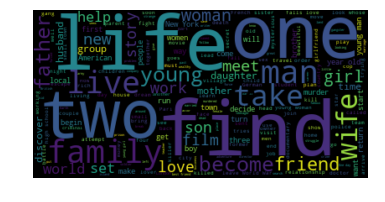

In [460]:
# Start with one review:

text = " ".join(plot for plot in movies['plot'])


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

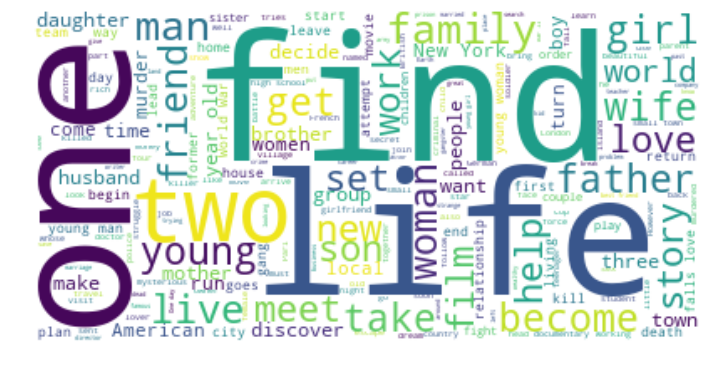

In [464]:
# Create stopword list:
#stopwords = set(stopwords.words('english'))
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()